In [5]:
# load data
import pandas as pd

customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")



In [6]:
# clean data
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
#handle duplicates and inconsistent data
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)


In [8]:
#Analysing features
print(customers.describe())
print(products.describe())
print(transactions.describe())


       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


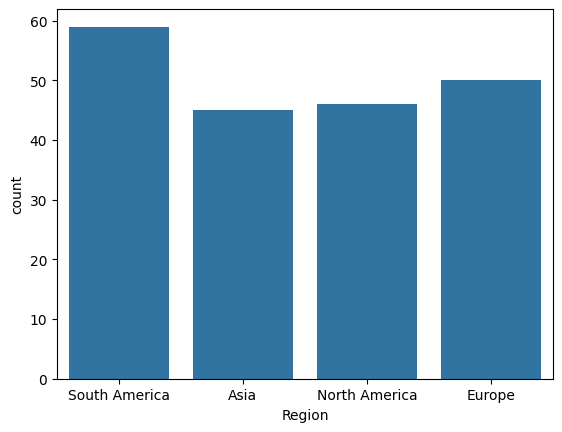

In [9]:
#Using Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Region', data=customers)
plt.show()


C:\Users\vijay\AppData\Local\Temp\ipykernel_20904\4056288269.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_selling_products['ProductName'][:10], y=best_selling_products['Quantity'][:10], palette='coolwarm')


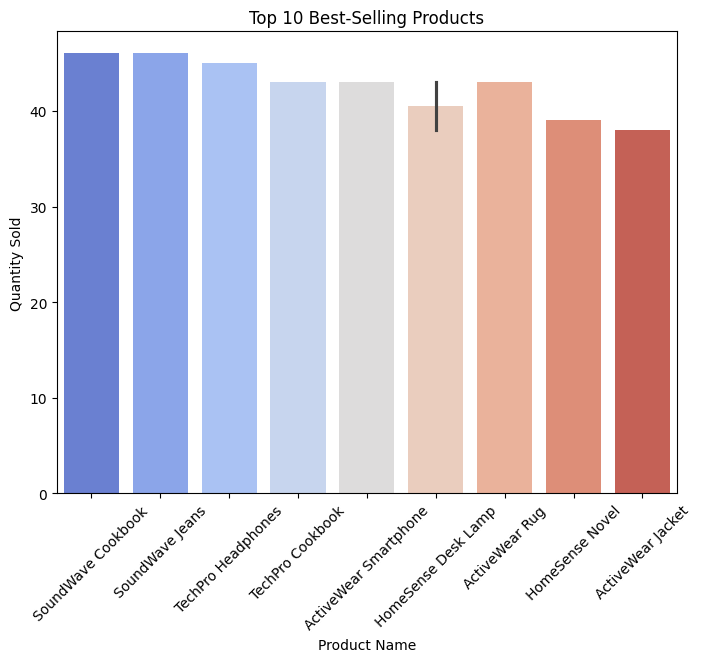

In [12]:
#Best-Selling Products and Categories
best_selling_products = transactions.groupby('ProductID').agg({'Quantity': 'sum'}).reset_index()
best_selling_products = pd.merge(best_selling_products, products, on='ProductID')
best_selling_products = best_selling_products.sort_values('Quantity', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=best_selling_products['ProductName'][:10], y=best_selling_products['Quantity'][:10], palette='coolwarm')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.savefig('Best_Selling_Products.png')
plt.show()

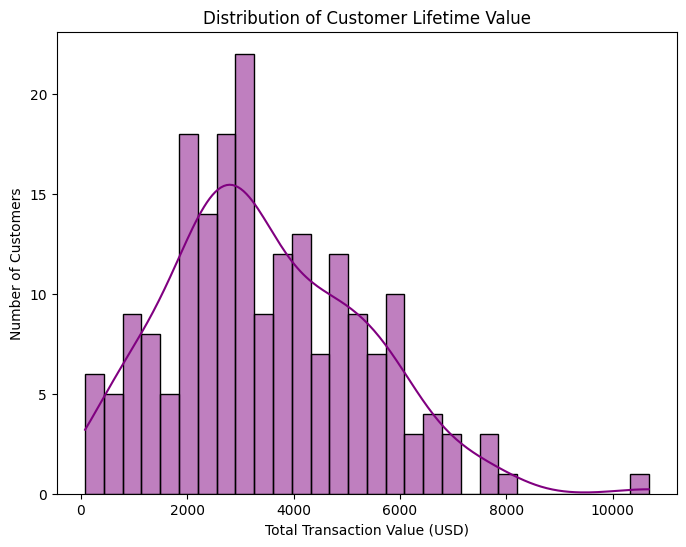

In [13]:
# High-Value Customers
high_value_customers = transactions.groupby('CustomerID').agg({'TotalValue': 'sum'}).reset_index()
high_value_customers = high_value_customers.sort_values('TotalValue', ascending=False)

plt.figure(figsize=(8, 6))
sns.histplot(high_value_customers['TotalValue'], bins=30, kde=True, color='purple')
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('Total Transaction Value (USD)')
plt.ylabel('Number of Customers')
plt.savefig('High_Value_Customers.png')
plt.show()

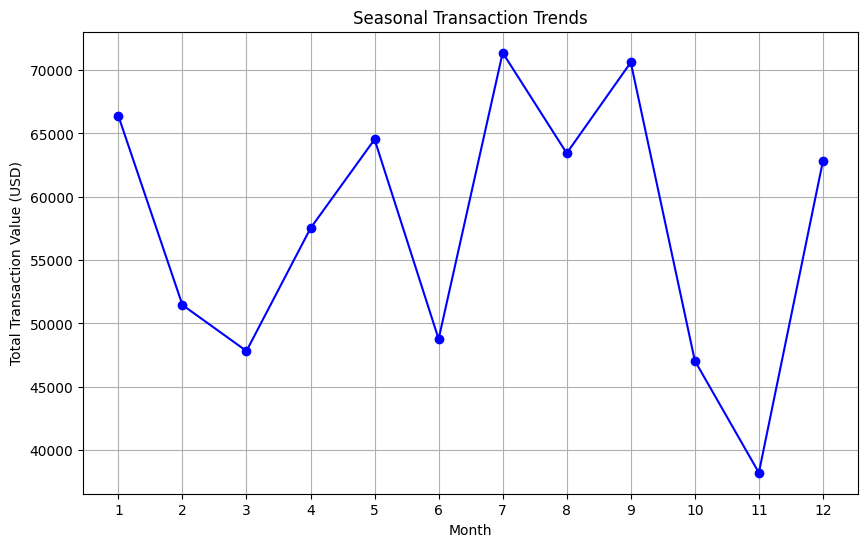

In [11]:
#seaonal trends in transactions
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


transactions['Month'] = transactions['TransactionDate'].dt.month
transactions['Year'] = transactions['TransactionDate'].dt.year


seasonal_trends = transactions.groupby('Month').agg({'TotalValue': 'sum'}).reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(seasonal_trends['Month'], seasonal_trends['TotalValue'], marker='o', color='b')
plt.title('Seasonal Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Total Transaction Value (USD)')
plt.xticks(range(1, 13))
plt.grid()
plt.show()


C:\Users\vijay\AppData\Local\Temp\ipykernel_20904\104640402.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=signup_trends.index, y=signup_trends.values, palette='mako')


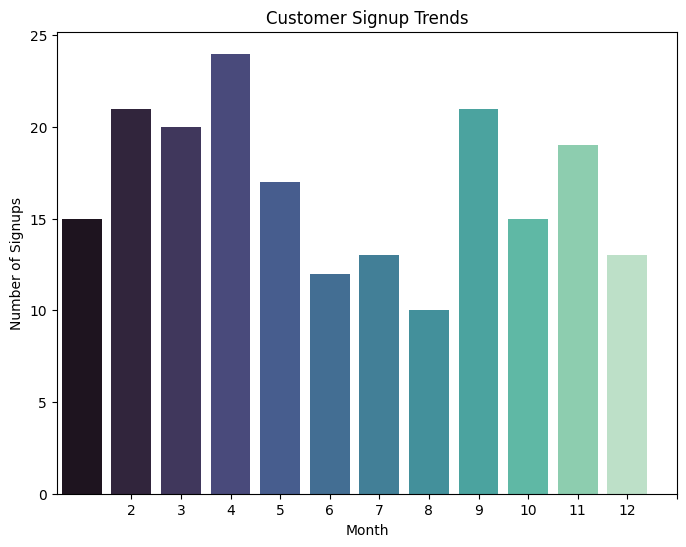

In [17]:
#  Customer Signup Patterns
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
customers = customers.dropna(subset=['SignupDate'])

customers['Month'] = customers['SignupDate'].dt.month
signup_trends = customers['Month'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=signup_trends.index, y=signup_trends.values, palette='mako')
plt.title('Customer Signup Trends')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(range(1, 13))
plt.savefig('Customer_Signup_Trends.png')
plt.show()